## Tutorial : Img2Img with LORA


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

/home/simo/anaconda3/envs/pytorch_latest/lib/python3.8/site-packages/torch/nn/modules/module.py:1402: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


  0%|          | 0/37 [00:00<?, ?it/s]

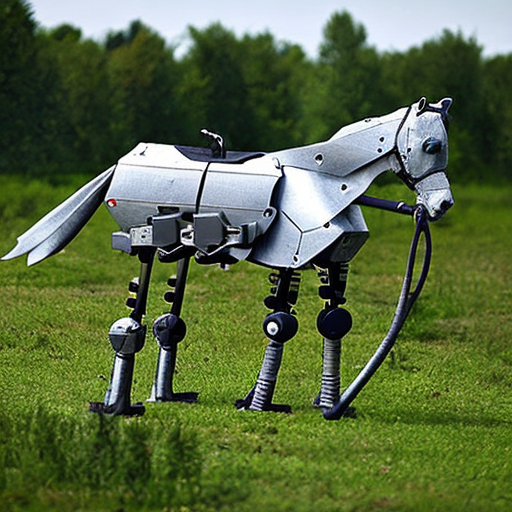

In [1]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image


init_image = Image.open("../contents/horse.jpg").convert("RGB").resize((512, 512))

model_id = "stabilityai/stable-diffusion-2-1-base"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)

prompt = "style of sks, robotic horse with rocket launcher"
torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image


  0%|          | 0/37 [00:00<?, ?it/s]

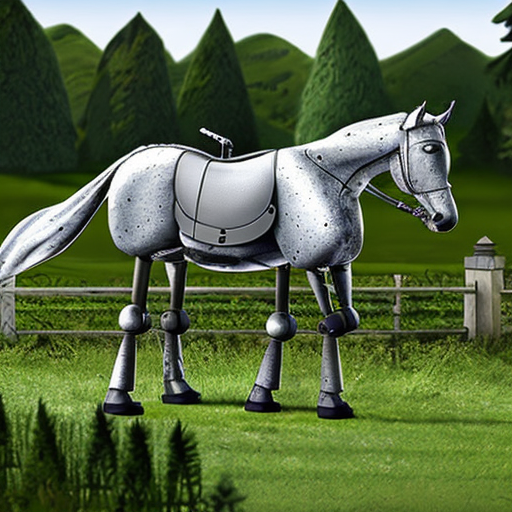

In [4]:
from lora_diffusion import monkeypatch_lora, tune_lora_scale


monkeypatch_lora(pipe.unet, torch.load("../lora_illust.pt"))
tune_lora_scale(pipe.unet, 1.00)

torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image


#


  0%|          | 0/37 [00:00<?, ?it/s]

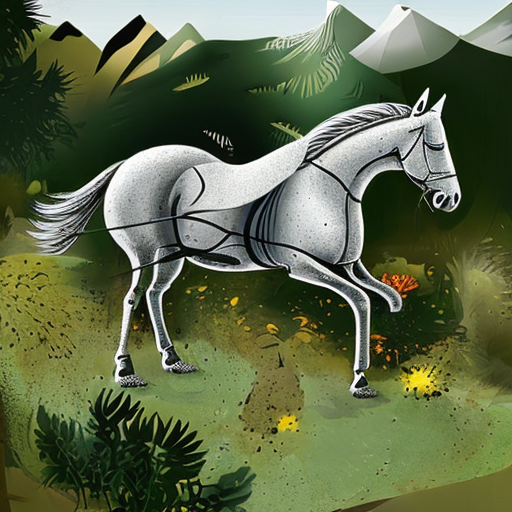

In [6]:
tune_lora_scale(pipe.unet, 1.5)

torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image

  0%|          | 0/37 [00:00<?, ?it/s]

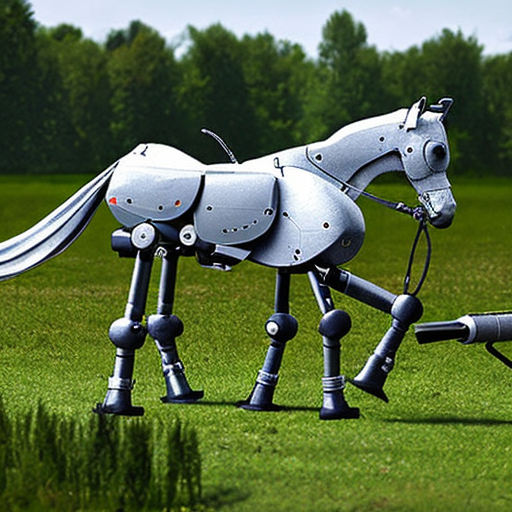

In [7]:
tune_lora_scale(pipe.unet, 0.5)

torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image